# Imports and Constants

In [33]:
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications 
from os.path import join
from matplotlib import pyplot as plt

In [27]:
path = 'type_data'
train_path = join(path, 'train')
test_path = join(path, 'test')
image_size = 75
channel = 3
color_mode = 'rgb'
class_mode = 'categorical'
classes = 3
batch_size = 32

In [34]:
train_generator = ImageDataGenerator(rescale = 1./255,
                                     height_shift_range = 0.3,
                                     width_shift_range = 0.3,
                                     rotation_range = 15,
                                     ).flow_from_directory(train_path, 
                                                           target_size = (image_size,image_size),
                                                           batch_size = batch_size,
                                                           class_mode = class_mode,
                                                           color_mode = color_mode)
test_generator = ImageDataGenerator(rescale = 1./255
                                     ).flow_from_directory(test_path, 
                                                           target_size = (image_size,image_size),
                                                           batch_size = batch_size,
                                                           class_mode = class_mode,
                                                           color_mode = color_mode)

Found 357 images belonging to 3 classes.
Found 167 images belonging to 3 classes.


# Type Model

In [37]:
inputs = layers.Input(shape = (image_size, image_size, channel))
pretrained = applications.inception_v3.InceptionV3(include_top=False,
                                                   weights = 'imagenet',
                                                   input_shape = (image_size, image_size, channel))(inputs)
x = layers.Flatten()(pretrained)
dense1 = layers.Dense(units=256, activation = 'relu')(x)
output = layers.Dense(units=3, activation='softmax')(dense1)

model = Model(inputs = inputs, outputs = output)

model.summary()

model.compile(optimizer=optimizers.Adam(1e-4), loss='categorical_crossentropy',
              metrics = ['acc'])

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 75, 75, 3)]       0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_15 (Flatten)        (None, 2048)              0         
                                                                 
 dense_22 (Dense)            (None, 256)               524544    
                                                                 
 dense_23 (Dense)            (None, 3)                 771       
                                                                 
Total params: 22,328,099
Trainable params: 22,293,667
Non-trainable params: 34,432
_________________________________________________________________


In [38]:
history = model.fit(train_generator, epochs = 64, validation_data = test_generator, callbacks = [])

Epoch 1/64
12/12 [==============================] - 8s 279ms/step - loss: 1.0034 - acc: 0.5098 - val_loss: 1.2050 - val_acc: 0.4970
Epoch 2/64
12/12 [==============================] - 2s 201ms/step - loss: 0.7208 - acc: 0.6947 - val_loss: 1.7535 - val_acc: 0.4551
Epoch 3/64
12/12 [==============================] - 2s 198ms/step - loss: 0.6396 - acc: 0.7423 - val_loss: 3.3865 - val_acc: 0.5150
Epoch 4/64
12/12 [==============================] - 2s 175ms/step - loss: 0.5569 - acc: 0.7899 - val_loss: 3.1990 - val_acc: 0.3653
Epoch 5/64
12/12 [==============================] - 2s 163ms/step - loss: 0.4555 - acc: 0.8291 - val_loss: 4.0019 - val_acc: 0.2575
Epoch 6/64
12/12 [==============================] - 2s 171ms/step - loss: 0.4644 - acc: 0.8207 - val_loss: 3.7073 - val_acc: 0.4072
Epoch 7/64
12/12 [==============================] - 2s 198ms/step - loss: 0.4322 - acc: 0.8347 - val_loss: 3.4485 - val_acc: 0.3832
Epoch 8/64
12/12 [==============================] - 2s 181ms/step - loss: 0.

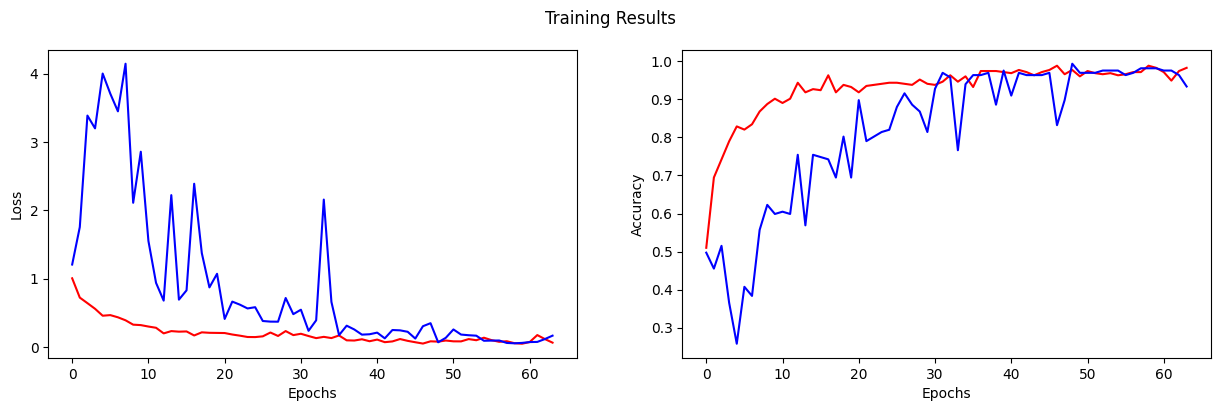

In [57]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_acc = history.history['acc']
test_acc = history.history['val_acc']
steps = [x for x in range(len(train_loss))]

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(train_loss, color='red')
plt.plot(test_loss, color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(122)
plt.plot(train_acc, color='red')
plt.plot(test_acc, color='b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.suptitle('Training Results')
plt.show()

In [58]:
# model.save('type_model.h5')

# Acidity-Moisture Model